**Creating csv**

In [3]:
import pandas as pd
import numpy as np
import os

dP = np.array([])
V = np.array([])

folder_path = "Measurement\Data\Calibration1"
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, sep=',')
    #df = pd.read_csv(file_path, sep=';')
    #df = df.replace(',', '.', regex=True)
    
    V = np.append(V,  round(np.mean(df.iloc[1:, 1].astype(float)),3))  # Get the second column

    p_val = ''
    for i in range(len(file)):
        if file[i] == '=':
            while file[i+1] != '.':
                if (file[i+1]==','):
                    p_val += '.'
                else:
                    p_val += file[i+1]
                i += 1
    dP = np.append(dP, float(p_val))

print(V)

R = 287.052874
T = 22.3 + 273.15
Ps = 1032.63 * 10**2

d1 = 100
d2 = 47.33
rho_a = Ps/(R*T)
U = np.round( np.sqrt(2*(-dP) / rho_a  * 1/((d2/d1)**4-1) ),3)

print(U)


# Write V and U to a CSV file
data = {'Voltage': V, 'Velocity': U, 'Pressure': dP}
df = pd.DataFrame(data)
df.to_csv('calibration_data.csv', index=False)


[0.482 0.732 0.913 1.664 2.79  1.741 1.873 3.001 1.123 3.19  2.048 1.267
 3.314 2.228 3.497 1.385 3.621 1.489 3.721 2.433 1.578 2.59 ]
[ 0.526  0.948  1.348  4.336 14.773  4.787  5.603 17.668  1.959 20.843
  6.862  2.471 23.247  8.349 27.012  2.952 29.875  3.417 32.589 10.471
  3.868 12.06 ]


**importing data**

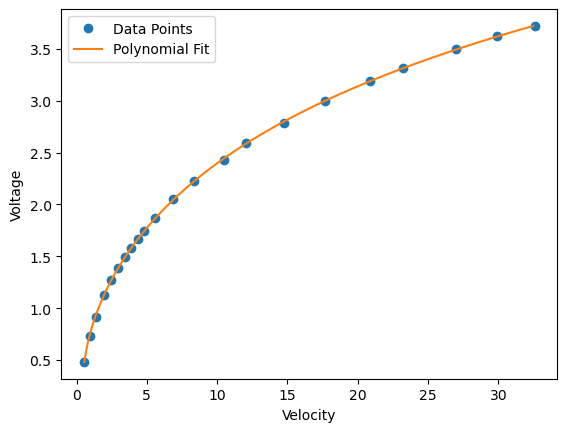

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

calibration_data = pd.read_csv('calibration_data.csv')
U = calibration_data['Velocity'].values
V = calibration_data['Voltage'].values

coefficients = np.polyfit(V, U, 4)
np.savetxt('polynomial_coefficients.txt', coefficients)

# coefficients = np.loadtxt('polynomial_coefficients.txt')

# Generate voltage values for plotting
voltage_values = np.linspace(min(V), max(V), 100)
velocity_values = np.polyval(coefficients, voltage_values)

plt.plot(U, V, 'o', label='Data Points')
plt.plot(velocity_values, voltage_values, label='Polynomial Fit')
plt.xlabel('Velocity')
plt.ylabel('Voltage')
plt.legend()
plt.show()

